<a href="https://colab.research.google.com/github/jdescartes24/visualization-showing-trends-in-std/blob/main/Data_Visualization_On_STD_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
Std= pd.read_csv('/content/STD Cases.csv')
Std.head()

,Disease,Disease Code,State,Year,Gender,Age,Age Code,STD Cases,Population,Rate per 100K
0,Chlamydia,274.0,Alabama,1996.0,Male,0-14 years,0-14,25.0,468394.0,5.34
1,Chlamydia,274.0,Alabama,1996.0,Male,15-19 years,15-19,164.0,165920.0,98.84
2,Chlamydia,274.0,Alabama,1996.0,Male,20-24 years,20-24,193.0,152848.0,126.27
3,Chlamydia,274.0,Alabama,1996.0,Male,25-29 years,25-29,88.0,152778.0,57.60
4,Chlamydia,274.0,Alabama,1996.0,Male,30-34 years,30-34,55.0,155850.0,35.29


# ***Droping rate per 100k because it would not play a role in the analysis i would be performing.***

In [ ]:

Std.drop(columns = ['Rate per 100K'], inplace = True)
Std['Population'].fillna(method='ffill')
Std.dropna(inplace = True)



In [ ]:
Std.isnull().sum()

Disease         0
Disease Code    0
State           0
Year            0
Gender          0
Age             0
Age Code        0
STD Cases       0
Population      0
dtype: int64

In [ ]:
from matplotlib import rcParams
Std.drop_duplicates(inplace = True)


# ***Wich are the bottom 5 Sates with The lowest number of cases?***

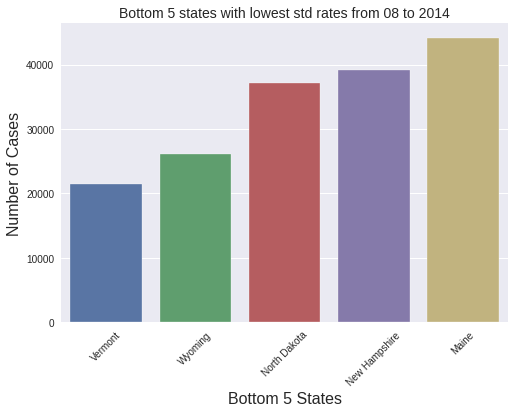

In [ ]:
B=Std.groupby('State')['STD Cases'].sum();
Sti= B.sort_values( ).head();
sns.barplot(x=Sti.index, y=Sti.values);
plt.title('Bottom 5 states with lowest std rates from 08 to 2014',fontsize = 14);
plt.xlabel('Bottom 5 States',fontsize = 16);
plt.ylabel('Number of Cases',fontsize = 16);
plt.xticks(rotation= 45);

# ***Wich are the Top5 Sates with The Highest number of cases?***

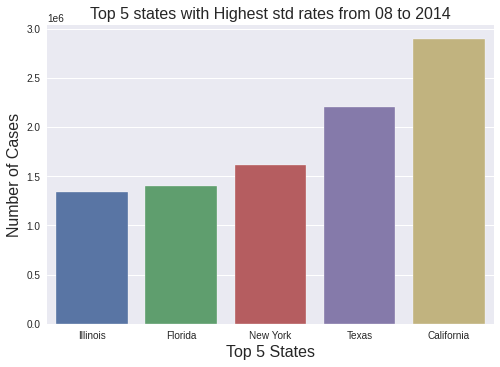

In [ ]:

s=Std.groupby('State')['STD Cases'].sum();
Sii= s.sort_values( ).tail();
sns.barplot(x=Sii.index, y=Sii.values);
plt.title('Top 5 states with Highest std rates from 08 to 2014',fontsize = 16);
plt.xlabel('Top 5 States',fontsize = 16);
plt.ylabel('Number of Cases',fontsize = 16);

# ***What was the most common Std in our data set?***

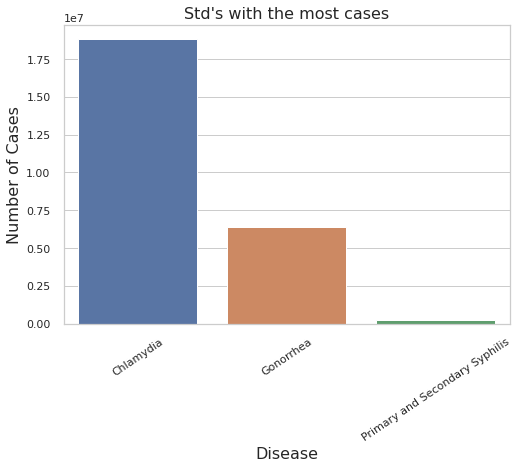

In [ ]:
sns.set_theme(style="whitegrid")
df=Std.groupby('Disease')['STD Cases'].sum();
sns.barplot(x=df.index, y=df.values);
plt.title("Std's with the most cases",fontsize = 16);
plt.xlabel('Disease',fontsize = 16);
plt.ylabel('Number of Cases',fontsize = 16);
plt.xticks(rotation= 34);

# ***Which gender saw the most cases ,and which std was the most commnon?***

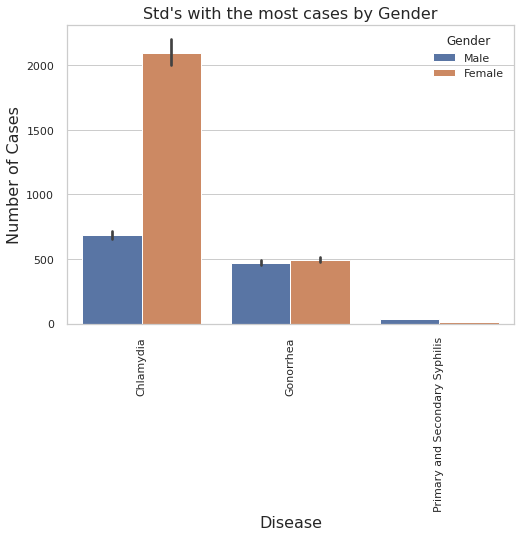

In [ ]:

sns.barplot(data=Std, x= 'Disease' , y= 'STD Cases', hue= 'Gender');
plt.xticks(rotation= 90);
plt.title("Std's with the most cases by Gender",fontsize = 16);
plt.xlabel('Disease',fontsize = 16);
plt.ylabel('Number of Cases',fontsize = 16);

# ***How was STD cases trending over time?***

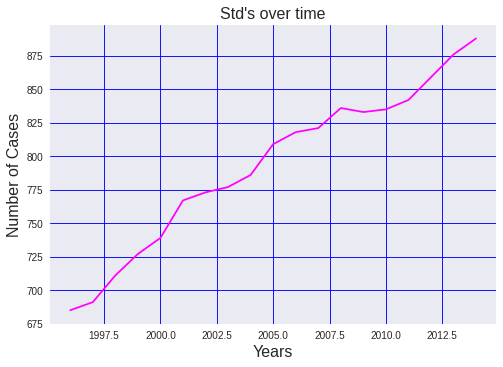

In [ ]:
numberYear = Std.groupby(['Year'])['STD Cases'].nunique()
Years = np.array(numberYear.index);
Cases = np.array(numberYear.values);
plt.style.use('seaborn');
plt.plot(Years, Cases, c='magenta');
plt.grid(c = 'blue', 
         alpha = .9,
         linestyle = '-');
plt.title("Std's over time",fontsize = 16);
plt.xlabel('Years',fontsize = 16);
plt.ylabel('Number of Cases',fontsize = 16);

# ***Did population size have any correlation to STD cases?***

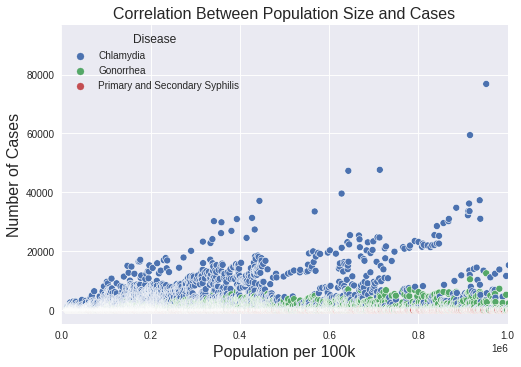

In [ ]:
sto = Std.groupby(['Population','Disease'])['STD Cases'].sum().reset_index()
sns.scatterplot(data=sto, x='Population',y='STD Cases', hue='Disease');
plt.title("Correlation Between Population Size and Cases",fontsize = 16);
plt.xlabel('Population per 100k',fontsize = 16);
plt.ylabel('Number of Cases',fontsize = 16);
plt.xlim(left=0,right=1000000)
plt.grid(alpha=20)

# ***Are there any correlations in our data set?***

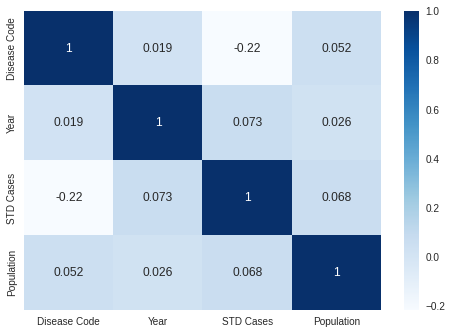

In [ ]:
corr= Std.corr();
sns.heatmap(corr, cmap='Blues',annot=True);

# ***which Age group has the highest STd cases by Gender?***

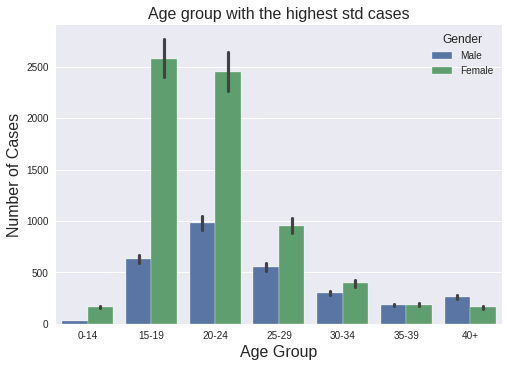

In [ ]:
sns.barplot(data=Std, x='Age Code', y='STD Cases', hue= 'Gender'  );
plt.title("Age group with the highest std cases",fontsize = 16);
plt.xlabel('Age Group',fontsize = 16);
plt.ylabel('Number of Cases',fontsize = 16);